In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base



# Reflect Tables into SQLAlchemy ORM

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [4]:
# Create inspector and connect to engine
inspector = inspect(engine)

# Collect names of tables within database
tables = inspector.get_table_names()

# Use inspector to print column names within 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

measurement
--------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
--------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create a session
session = Session(engine) # ORM
conn = engine.connect() # Raw SQL/Pandas

In [10]:
# Look at data
query = text("""SELECT * from station LIMIT 10""")
df = pd.read_sql(query, con=conn)
df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
# Look at data
query = text("""SELECT * from measurement where date = '2010-01-01' LIMIT 10""")
df = pd.read_sql(query, con=conn)
df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2725,USC00513117,2010-01-01,0.28,67.0
2,9008,USC00518838,2010-01-01,0.21,72.0
3,9519,USC00519523,2010-01-01,0.15,75.0
4,12188,USC00519281,2010-01-01,0.15,70.0
5,14960,USC00511918,2010-01-01,0.05,66.0
6,16939,USC00516128,2010-01-01,0.14,73.0


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
query = text("""SELECT max(date) from measurement;""")
conn.execute(query).fetchall()

[('2017-08-23',)]

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
query = text("""SELECT  id, station, date, prcp
                FROM  measurement
                WHERE  date >= '2016-08-23'
                ORDER BY  date;""")
df_1 = pd.read_sql(query, con=conn)
df_1.head()

,id,station,date,prcp
0,2364,USC00519397,2016-08-23,0.00
1,5091,USC00513117,2016-08-23,0.15
2,7331,USC00514830,2016-08-23,0.05
3,8825,USC00517948,2016-08-23,NaN
4,11851,USC00519523,2016-08-23,0.02


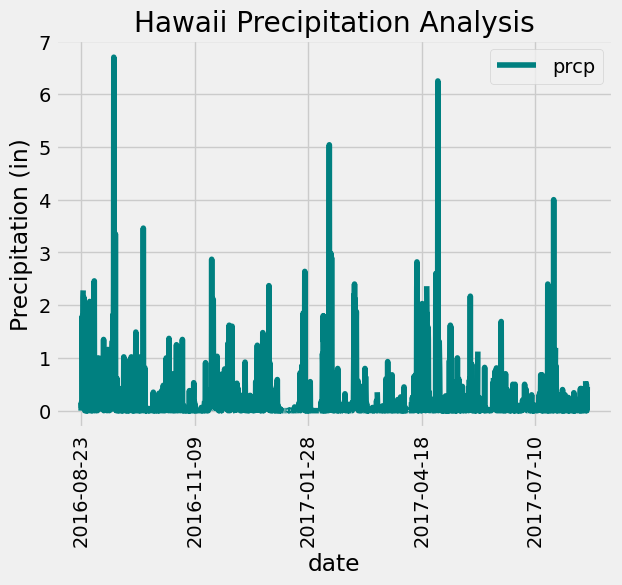

In [19]:
# Make a plot
df_1.plot(x="date", y="prcp", color="teal")
plt.title("Hawaii Precipitation Analysis")
plt.ylabel("Precipitation (in)")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_1.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
query = text("""SELECT COUNT(DISTINCT station) FROM station;""")
conn.execute(query).fetchall()

[(9,)]

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text(""" SELECT station, COUNT(*) as station_count
                FROM measurement
                GROUP BY station
                ORDER BY station_count DESC;""")
conn.execute(query).fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text(""" SELECT 
                    MIN(tobs) AS min_temperature,
                    MAX(tobs) AS max_temperature,
                    AVG(tobs) AS avg_temperature
                FROM measurement
                WHERE station = 'USC00519281'; """)
conn.execute(query).fetchall()

[(54.0, 85.0, 71.66378066378067)]

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = text(""" SELECT tobs
                FROM measurement
                WHERE station = 'USC00519281' AND date >= '2016-08-23' """)
result = conn.execute(query).fetchall()

#Turn result into a DataFrame
df3 = pd.DataFrame(result, columns=["tobs"])

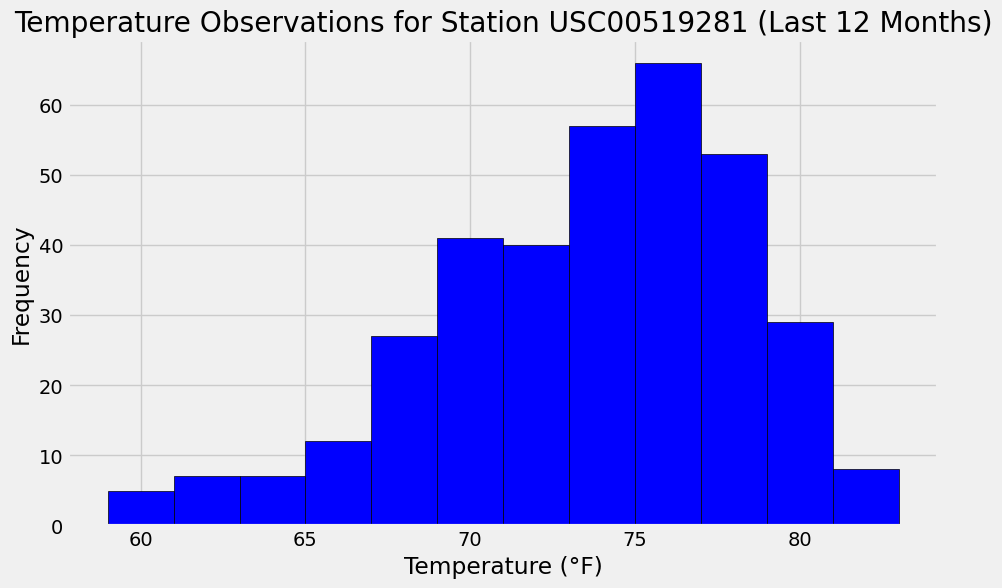

In [36]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df3["tobs"], bins=12, color="blue", edgecolor="black")
plt.title("Temperature Observations for Station USC00519281 (Last 12 Months)")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()
